# Data shuffle part

__Steam Games Predictor__ by: _Kornel Zieliński, Krystian Rodzaj, Krytian Wojakiewicz_

## Data load and its structure

Firstly we imported some helpful libraries and defined global variables. Variable names are pretty much self self explanatory, __Numpy__ library was imported to help with mathematical problems and data preprocessing, an __Os__ library provides ways of cooperating with the operating system. 

In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "preparing_dataset"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "pictures", CHAPTER_ID)

Then we defined some help functions. First one on the list _save_fig_ function that is responsible for saving generated during the excercise images.

In [2]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving image", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Next one is the _load_data_ function that loads our csv file and saves it as _Pandas's DataFrame_. __Pandas__ library is a tool that enables data analysis and manipulation in __Python__, it provides a lot of functions and objects such as previously mentioned __DataFrame__ that is basically a data structure build with labeled columns and rows (like excel table or database).

In [3]:
import os
import pandas as pd

def load_data(steam_path, file):
    csv_path = os.path.join(steam_path, file)
    return pd.read_csv(csv_path, error_bad_lines=False)

Now we can load our data and assing it to a variable creating a DataFrame object and see how it's structured. To do that we've used prevoiusly declared load_data function and then __head()__ function of the DataFrame object. The second one return first few rows of the DataFrame, the default value of the rows is 5 but it can be also specified inside the bracket.

In [4]:
steam = load_data('../data', 'steam.csv')
steam.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


Great, as you can see our csv file has been successfully loaded into DataFrame object, we can see it consists of 14 columns, from now on these columns will be called attributes. Now we want to find out how many rows our _steam_ object has. To do that we need use __info()__ functions from the DataFrame object that does excatly what its name says - it prints information about the DataFrame object such as:
1. name of the column
2. number of entries (rows)
3. number of columns (attributes)
4. number of non-null values
5. types of the attributes

In [5]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

Now we can see that thankfully dataset does not consist any null values and we don't have to fill them in. Names of the attributes are pretty much self explanatory but just to be clear we've clarified some of important for us:
1. english - tells whether suppotrs english lanuague (binary attribute - 0/1)
2. platforms - tells on whick platform game is available (three main platforms semicolon separated)
3. owners - tells how many gamers bought the game

Now seeing how the most important for us attributes are _owners_ and to be made _rating_ we can try to get some interesting information. There are some __object__ types (basically string) in out dataset that will require encoding into numerical values before looking for correlation (only numerical attributes can be used in correlation founding functions) and preprocessing with some machine learning (same point). Firstly we can check some attributes without encoding them, let's check our owners attribute then. For that we'll use __value_counts()__ function from the Pandas's __Series__ object. Series is one-dimensional array, it's from what DataFrame object is build. 

In [6]:
steam["owners"].value_counts()

0-20000                18596
20000-50000             3059
50000-100000            1695
100000-200000           1386
200000-500000           1272
500000-1000000           513
1000000-2000000          288
2000000-5000000          193
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64

Now we can see how our owners attribute is classified, of course there are 18596 games owned by 0-20000 gamers, but there's only one game owned by 100000000-200000000 that being __Dota 2__. 

Great, now let's check platforms attribute in the same way. We can also visualize this by building this attribute's histogram.

In [7]:
steam["platforms"].value_counts()

windows              18398
windows;mac;linux     4623
windows;mac           3439
windows;linux          610
mac                      3
linux                    1
mac;linux                1
Name: platforms, dtype: int64

Saving image platforms_hist


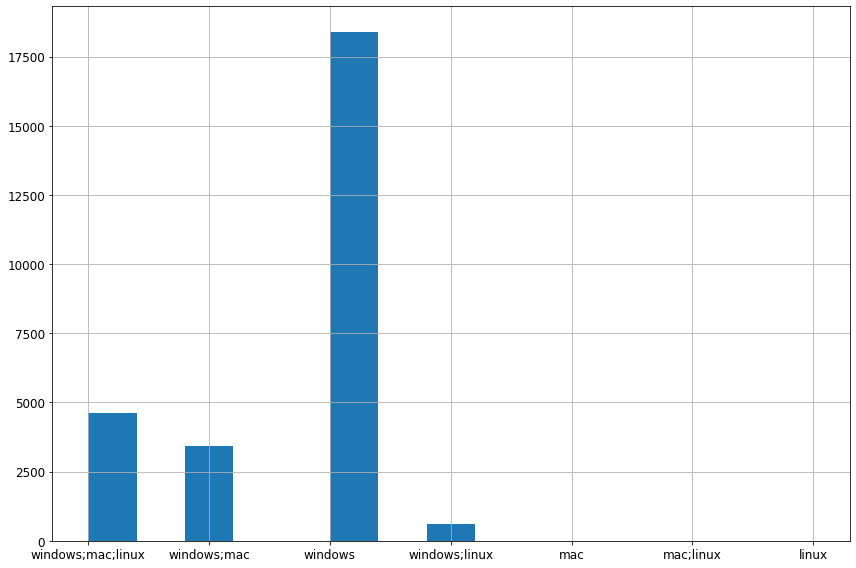

In [8]:
# import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
steam["platforms"].hist(bins=15)
save_fig("platforms_hist")
plt.show()

Ok, by that we can see that this attribute consists of categorical values separated by semicolon, in next steps we'll change it into indicator variables. Let's end the first phase here and continue work on our dataset after encoding string values into numerical ones.

## Encoding the data and seraching for correlations

Seeing how now we start to manipulate the data best practice to do so is to work on the copy of the data, let's do exactly that and after that delete some of the attributes that won't be important for us. After a long discussion we decided that we won't need:
1. appid - it does not contain any relevant information from the machine learning point of view
2. name - non-categorical value, it would be hard to extract some interesting information from it
3. steamspy_tags - redundant information, same can be found in categories and genres attributes
4. price - non-relevant information, especially at the date of the premier

Then we used _drop()_ function from Pandas with the specified column names

In [9]:
steam_cp = steam.copy()
steam_cp = steam_cp.drop(columns=["appid", "name", "steamspy_tags", "price"])

Next step is to encode object attributes that are important for us, we could use objects provided by the Pandas library like LabelEncoder, but decided define our own function, that will encode the entire column and also create a dictionary where we will store our labels with their keys. The function is shown below.

In [10]:
def encode_series(series):
    col = pd.Series(steam_cp[series])
    dictionary = {}
    enc_series = []
    i = 0
    for c in col:
        if c not in dictionary.keys():
            dictionary[c] = (i, c)
            i = i + 1
        x = dictionary[c][0]
        enc_series.append(x)
    return enc_series, dictionary

And then with the help of the above function we encoded following columns: developer, publisher and owners

In [11]:
enc_dev, dev_dict = encode_series('developer')
enc_publ, publ_dict = encode_series('publisher')
enc_own, own_dict = encode_series('owners')

## TODO
funckcja zapisująca słownik do pliku wraz z jej opisem

The next columns that had to be encoded were genres and categories. However, in this case we had to use another function to encode them. Because the data was saved in the following way: dataA;dataB;dateC... we had to separate this data and create columns from it. But before this process, we checked what new potential columns are to be created when we did it.

In [12]:
def extract_values_in_columns(column):
    col = pd.Series(steam_cp[column])
    col_value_list = []
    col_value_set = set()

    for c in col:
        col_value_list.append(c.split(";"))

    for row in col_value_list:
        for r in row:
            col_value_set.add(r)
            
    return col_value_set

In [13]:
genres_set = extract_values_in_columns("genres")
cats_set = extract_values_in_columns("categories")
cats_set

{'Captions available',
 'Co-op',
 'Commentary available',
 'Cross-Platform Multiplayer',
 'Full controller support',
 'In-App Purchases',
 'Includes Source SDK',
 'Includes level editor',
 'Local Co-op',
 'Local Multi-Player',
 'MMO',
 'Mods',
 'Mods (require HL2)',
 'Multi-player',
 'Online Co-op',
 'Online Multi-Player',
 'Partial Controller Support',
 'Shared/Split Screen',
 'Single-player',
 'Stats',
 'Steam Achievements',
 'Steam Cloud',
 'Steam Leaderboards',
 'Steam Trading Cards',
 'Steam Turn Notifications',
 'Steam Workshop',
 'SteamVR Collectibles',
 'VR Support',
 'Valve Anti-Cheat enabled'}

After that we used function get_dumies(sep=;) which separated the data in column and then created from them new columns with appropriately allocated values.

In [14]:
steam_cp["categories"].str.get_dummies(sep=';')

,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,Full controller support,In-App Purchases,Includes Source SDK,Includes level editor,Local Co-op,Local Multi-Player,...,Stats,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,VR Support,Valve Anti-Cheat enabled
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
27071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27072,0,1,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
27073,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [15]:
pos = pd.Series(steam_cp['positive_ratings'])
neg = pd.Series(steam_cp['negative_ratings'])
ratings = []
for p, n in zip(pos, neg):
    total = p + n
    i = np.round((p/total)*100)
    ratings.append(i)
    
steam_cp["Rating"] = ratings
steam_cp.head(10)

,release_date,english,developer,publisher,platforms,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,Rating
0,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,17612,317,10000000-20000000,97.0
1,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,277,62,5000000-10000000,84.0
2,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,187,34,5000000-10000000,90.0
3,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,258,184,5000000-10000000,83.0
4,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,624,415,5000000-10000000,95.0
5,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,0,2758,684,175,10,5000000-10000000,80.0
6,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,0,27755,1100,1300,83,5000000-10000000,96.0
7,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,12120,1439,427,43,10000000-20000000,89.0
8,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,0,3822,420,361,205,5000000-10000000,90.0
9,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,33,67902,2419,691,402,10000000-20000000,97.0


In [16]:
dates = pd.Series(steam_cp['release_date'])
dates = pd.to_datetime(dates, format = '%Y-%m-%d')
months = []
years = []

for i in dates:
    d = i.month
    months.append(d)
    y = i.year
    years.append(y)
    
steam_cp["Month"] = months
steam_cp["Year"] = years
steam_cp.head(20)

,release_date,english,developer,publisher,platforms,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,Rating,Month,Year
0,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,17612,317,10000000-20000000,97.0,11,2000
1,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,277,62,5000000-10000000,84.0,4,1999
2,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,187,34,5000000-10000000,90.0,5,2003
3,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,258,184,5000000-10000000,83.0,6,2001
4,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,624,415,5000000-10000000,95.0,11,1999
5,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,0,2758,684,175,10,5000000-10000000,80.0,11,2000
6,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,0,27755,1100,1300,83,5000000-10000000,96.0,11,1998
7,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,12120,1439,427,43,10000000-20000000,89.0,3,2004
8,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,0,3822,420,361,205,5000000-10000000,90.0,6,2001
9,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,33,67902,2419,691,402,10000000-20000000,97.0,11,2004


## TODO
Ładna funkcja zapisująca wszystko co poniżej do nowego datasetu wraz z jej opisem

In [17]:
enc_steam = pd.DataFrame()
enc_steam["Month"] = months
enc_steam["Year"] = years
enc_steam["English"] = steam_cp["english"]
enc_steam["Developer"] = enc_dev
enc_steam["Publisher"] = enc_publ
enc_steam = pd.concat([enc_steam, steam_cp["platforms"].str.get_dummies(sep=';')], axis=1)
enc_steam["Required_Age"] = steam_cp["required_age"]
enc_steam = pd.concat([enc_steam, steam_cp["categories"].str.get_dummies(sep=';')], axis=1)
enc_steam = pd.concat([enc_steam, steam_cp["genres"].str.get_dummies(sep=';')], axis=1)
enc_steam["Achievements"] = steam_cp["achievements"]
enc_steam["Average_Playtime"] = steam_cp["average_playtime"]
enc_steam["Median_Playtime"] = steam_cp["median_playtime"]
enc_steam["Rating"] = ratings
enc_steam["Owners"] = enc_own

In [18]:
enc_steam

,Month,Year,English,Developer,Publisher,linux,mac,windows,Required_Age,Captions available,...,Tutorial,Utilities,Video Production,Violent,Web Publishing,Achievements,Average_Playtime,Median_Playtime,Rating,Owners
0,11,2000,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,17612,317,97.0,0
1,4,1999,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,277,62,84.0,1
2,5,2003,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,187,34,90.0,1
3,6,2001,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,258,184,83.0,1
4,11,1999,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,624,415,95.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,4,2019,1,17110,14353,0,0,1,0,0,...,0,0,0,0,0,7,0,0,100.0,12
27071,4,2019,1,17111,11772,0,0,1,0,0,...,0,0,0,0,0,0,0,0,89.0,12
27072,4,2019,1,8016,6199,0,0,1,0,0,...,0,0,0,0,0,24,0,0,0.0,12
27073,4,2019,1,5751,1995,0,1,1,0,0,...,0,0,0,0,0,0,0,0,100.0,12
